In [20]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [21]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10324,146684,Cosmic Scrat-tastrophe (2015),Animation|Children|Comedy
10325,146878,Le Grand Restaurant (1966),Comedy
10326,148238,A Very Murray Christmas (2015),Comedy
10327,148626,The Big Short (2015),Drama


In [22]:
ratings

,userId,movieId,rating,timestamp
0,1,16,4.000,1217897793
1,1,24,1.500,1217895807
2,1,32,4.000,1217896246
3,1,47,4.000,1217896556
4,1,50,4.000,1217896523
...,...,...,...,...
105334,668,142488,4.000,1451535844
105335,668,142507,3.500,1451535889
105336,668,143385,4.000,1446388585
105337,668,144976,2.500,1448656898


In [23]:
final_dataset = ratings.pivot(index='movieId', columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.000,NaN,NaN,4.000,NaN,NaN,5.000,NaN,NaN,...,NaN,NaN,4.000,5.000,3.000,NaN,NaN,NaN,NaN,3.000
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.000,NaN,NaN,NaN,NaN,NaN,3.000
3,NaN,2.000,NaN,NaN,NaN,NaN,NaN,4.000,3.000,NaN,...,NaN,NaN,3.000,NaN,NaN,NaN,NaN,NaN,NaN,2.000
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.000,3.000,NaN,NaN,NaN,NaN,3.000,NaN,NaN,...,NaN,NaN,3.000,NaN,NaN,NaN,NaN,NaN,NaN,2.500


In [24]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()


userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.000,5.000,0.000,0.000,4.000,0.000,0.000,5.000,0.000,0.000,...,0.000,0.000,4.000,5.000,3.000,0.000,0.000,0.000,0.000,3.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,0.000,3.000
3,0.000,2.000,0.000,0.000,0.000,0.000,0.000,4.000,3.000,0.000,...,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.000,3.000,3.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,...,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,2.500


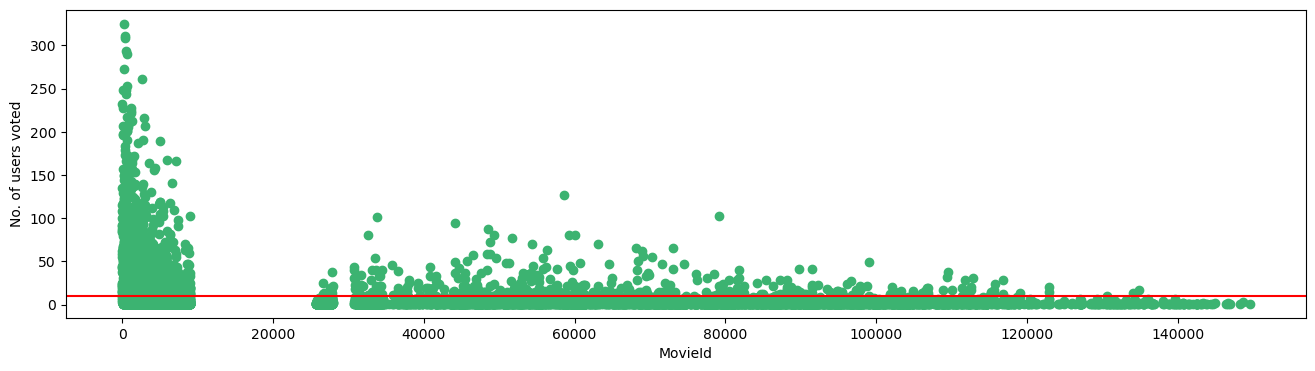

In [25]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')

f, ax = plt.subplots(1,1, figsize=(16,4))
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')                                         
plt.show()


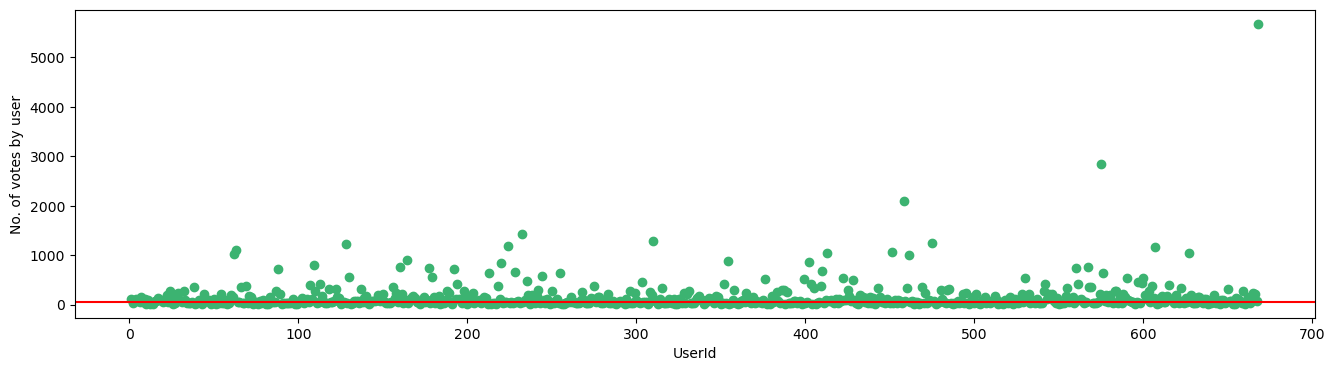

In [26]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted>10].index,:]

f, ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()


In [27]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted>50].index]
final_dataset.head()


userId,1,3,4,5,6,7,8,9,11,15,...,656,657,659,661,662,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.000,0.000,0.000,4.000,0.000,0.000,5.000,0.000,4.000,0.000,...,0.000,0.000,0.000,4.000,5.000,0.000,0.000,0.000,0.000,3.000
2,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.000,0.000,0.000,0.000,5.000,0.000,0.000,0.000,0.000,3.000
3,0.000,0.000,0.000,0.000,0.000,0.000,4.000,3.000,0.000,0.000,...,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,2.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5,0.000,3.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,...,3.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,2.500


In [28]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - (np.count_nonzero(sample)/float(sample.size))
print(sparsity)

csr_sample = csr_matrix(sample)
print(csr_sample)

0.7333333333333334
  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [29]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

knn = NearestNeighbors(metric='cosine',algorithm='brute',n_neighbors=20,n_jobs=1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=1, n_neighbors=20)

In [30]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [31]:
get_movie_recommendation('Robot')

,Title,Distance
1,300 (2007),0.475
2,Constantine (2005),0.472
3,I Am Legend (2007),0.470
4,Hellboy II: The Golden Army (2008),0.468
5,Live Free or Die Hard (2007),0.465
6,Equilibrium (2002),0.456
7,"Bourne Supremacy, The (2004)",0.456
8,Pitch Black (2000),0.455
9,"Matrix Revolutions, The (2003)",0.453
10,"Chronicles of Riddick, The (2004)",0.382


In [32]:
get_movie_recommendation('Lion King')

,Title,Distance
1,Pretty Woman (1990),0.421
2,Batman Forever (1995),0.413
3,Ace Ventura: Pet Detective (1994),0.407
4,"Mask, The (1994)",0.403
5,Speed (1994),0.392
6,Mrs. Doubtfire (1993),0.355
7,Jurassic Park (1993),0.353
8,Forrest Gump (1994),0.353
9,Beauty and the Beast (1991),0.293
10,Aladdin (1992),0.261


In [33]:
get_movie_recommendation('Aladdin')

,Title,Distance
1,Ace Ventura: Pet Detective (1994),0.418
2,Toy Story (1995),0.412
3,Batman (1989),0.404
4,Speed (1994),0.401
5,Forrest Gump (1994),0.394
6,Batman Forever (1995),0.383
7,Mrs. Doubtfire (1993),0.379
8,Jurassic Park (1993),0.371
9,Beauty and the Beast (1991),0.313
10,"Lion King, The (1994)",0.261
